In [1]:
from subprocess import PIPE, run
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

%matplotlib inline

# Let's read the EXIF metadata using the exiftool
### The images used in this notebooks we're taken using a iPhone X in Portrait mode
- Let's read the `ImageData` part of the exif metadata as binary (which contains the right view image as a binary string
> We use `exiftool` and add the `-b` argument to parse as binary and segment the `MPImage2` attribute using the `-MPImage2` argument, NOICE!
- Write/use the depth image

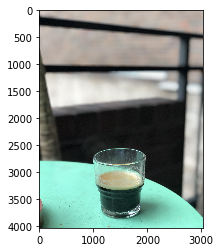

In [5]:
# Read the original image
original_file_path = '../samples/iphone_portrait_ORIGINAL.jpg'
original_rgb = Image.open(original_file_path)

# Show it!
plt.imshow(left_view_image)
plt.show()

### Run `exiftool` and grab the binary image data from the EXIF metadata

In [6]:
image_data_from_exif = run(['exiftool', '-b', '-MPImage2', original_file_path], stdout=PIPE)

### If you want to write the depthmap to disk as an image simply run:
```
with open('../samples/depthmap.jpg', 'wb') as newFile:
    newFile.write(image_data_from_exif.stdout)
```

In [7]:
original_depthmap = Image.open(BytesIO(image_data_from_exif.stdout))

/usr/local/lib/python3.5/dist-packages/PIL/JpegImagePlugin.py:790: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn("Image appears to be a malformed MPO file, it will be "


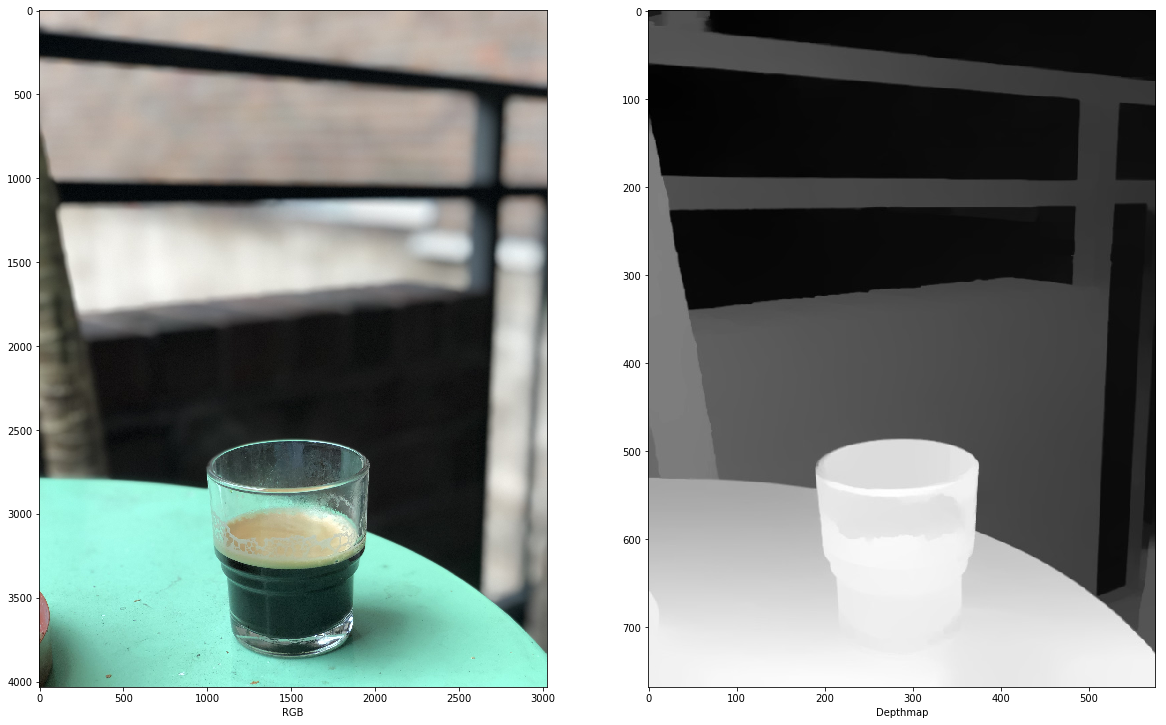

In [10]:
f = plt.figure(figsize=(20, 20))
f.add_subplot(1,2, 1)
plt.imshow(original_rgb)
plt.xlabel('RGB')
f.add_subplot(1,2, 2)
plt.imshow(original_depthmap)
plt.xlabel('Depthmap')
plt.show()